In [282]:
import numpy as np
import math
import csv
import xlrd
import matplotlib.pyplot as plt
with open('outprice.csv', newline='') as csvfile:
    pricereader = csv.reader(csvfile, delimiter=';',quotechar='|')
    pricelist = list(pricereader)
    print(pricelist)

[['SABR PRICES', ''], [' ', 'strikes:', '-150', '-100', '-50', '-25', 'ATM', '25', '50', '100', '150', ''], ['2y', '3m', '0.0092', '0.0047', '0.0010', '0.0002', '0.0000', '0.0000', '0.0000', '0.0000', '0.0000', ''], ['2y', '6m', '0.0091', '0.0050', '0.0016', '0.0006', '0.0002', '0.0001', '0.0000', '0.0000', '0.0000', ''], ['2y', '9m', '0.0090', '0.0051', '0.0020', '0.0010', '0.0005', '0.0002', '0.0001', '0.0000', '0.0000', ''], ['2y', '1y', '0.0089', '0.0052', '0.0023', '0.0013', '0.0008', '0.0005', '0.0003', '0.0001', '0.0001', ''], ['2y', '2y', '0.0097', '0.0071', '0.0045', '0.0034', '0.0025', '0.0018', '0.0014', '0.0010', '0.0008', ''], ['2y', '5y', '0.0052', '0.0041', '0.0031', '0.0027', '0.0023', '0.0020', '0.0018', '0.0013', '0.0010', ''], ['2y', '10y', '0.0018', '0.0015', '0.0012', '0.0010', '0.0009', '0.0008', '0.0007', '0.0006', '0.0005', ''], ['5y', '3m', '0.0141', '0.0094', '0.0048', '0.0027', '0.0012', '0.0004', '0.0001', '0.0000', '0.0000', ''], ['5y', '6m', '0.0133', '0.0

In [283]:
h = 0.0001*50
l1 = len(pricelist)

for k in range(2,l1):
    for j in range(2,len(pricelist[k])-1):
        pricelist[k][j] = float(pricelist[k][j])
        #print(pricelist[k][j])

sec_der_K = []
for k in range(2,l1):
    for j in range(0,l2-1):
        if j==0 or j==1:
            der = pricelist[k][j]
        elif j==2 or j==l2-2:
            der = 'No data'
        else:
            der = (pricelist[k][j+1] - 2*pricelist[k][j] + pricelist[k][j-1])/h**2
        sec_der_K.append(der)
#formated_der = [math.ceil(ele*10000)/10000 for ele in sec_der_K]

#print(sec_der_K)

In [307]:
labels = ['Tenor','Expiry','-150','-100','-50','-25','ATM','25','50','100','150']
lst_parser = len(labels)
new_sec_der_K = [sec_der_K[k:k+lst_parser] for k in range(0, len(sec_der_K)-1, lst_parser)]
print(new_sec_der_K)

[['2y', '3m', 'No data', 31.999999999999943, 116.0, 24.0, 8.0, 0.0, 0.0, 0.0, 'No data'], ['2y', '6m', 'No data', 28.00000000000004, 95.99999999999999, 24.00000000000001, 11.999999999999996, 0.0, 4.0, 0.0, 'No data'], ['2y', '9m', 'No data', 31.999999999999943, 84.00000000000001, 20.0, 7.999999999999999, 7.999999999999999, 0.0, 4.0, 'No data'], ['2y', '1y', 'No data', 32.000000000000014, 75.99999999999999, 20.0, 7.999999999999995, 3.9999999999999973, 4.336808689942018e-15, 7.999999999999999, 'No data'], ['2y', '2y', 'No data', 0.0, 60.00000000000005, 7.999999999999986, 7.999999999999986, 12.000000000000014, 0.0, 7.999999999999995, 'No data'], ['2y', '5y', 'No data', 3.9999999999999756, 24.00000000000003, -1.734723475976807e-14, 4.000000000000011, 3.999999999999993, -11.999999999999996, 8.000000000000004, 'No data'], ['2y', '10y', 'No data', -8.673617379884035e-15, 4.000000000000011, 3.999999999999993, 0.0, -4.336808689942018e-15, 0.0, 4.336808689942018e-15, 'No data'], ['5y', '3m', 'No

In [286]:
with open("outpdf.csv", "w") as f:
    writer = csv.DictWriter(f, fieldnames=labels)
    writer.writeheader()
    writer = csv.writer(f)
    writer.writerows(new_sec_der_K)

In [287]:
outpdf.close()

In [297]:
while True:
    try:
        file_input = xlrd.open_workbook('market_data.xlsx')     # load market data
    except:
        print('Input file is not in the directory!') 
    break
Market_data = file_input.sheet_by_name('Swaptions data')        # file input forward rates

strike_spreads=[]
j=0
while True:
    try:
        strike_spreads.append(int(Market_data.cell(1,3+j).value))
        j = j+1
    except:
        break
num_strikes = len(strike_spreads)

F = []
i=0
while True:
    try:
        F.append(Market_data.cell(2+i,2).value)
        i = i+1
    except:
        break
        
K = np.zeros((len(F),num_strikes))
for i in range(len(F)):
    for j in range(num_strikes):
        K[i][j] = F[i] + 0.0001*(strike_spreads[j])  
K_list = K.tolist()

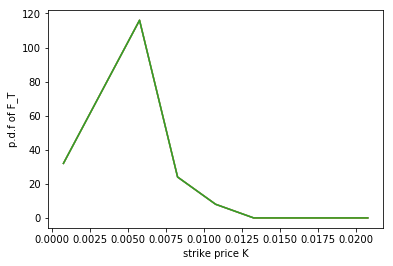

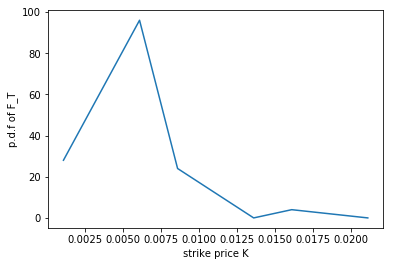

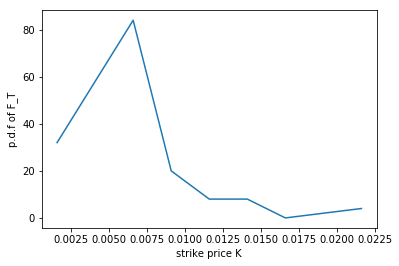

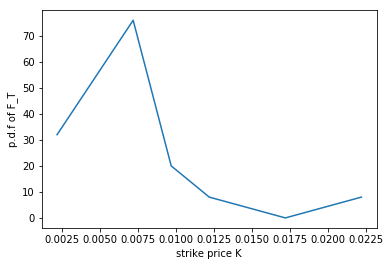

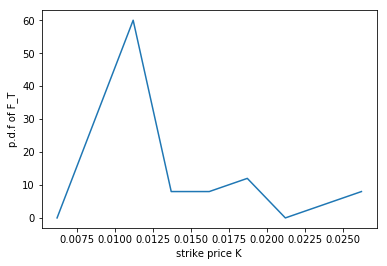

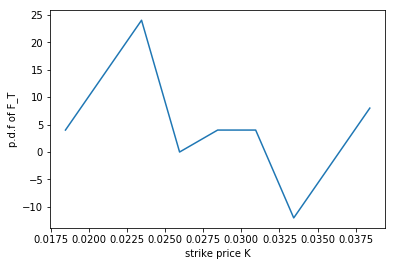

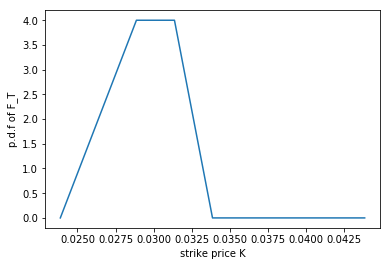

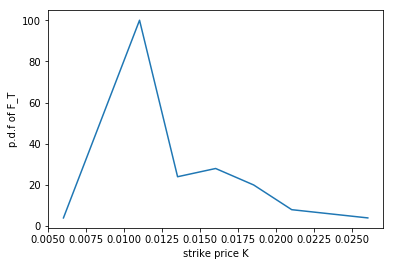

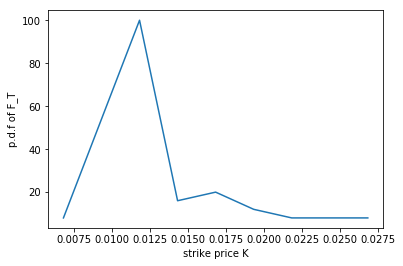

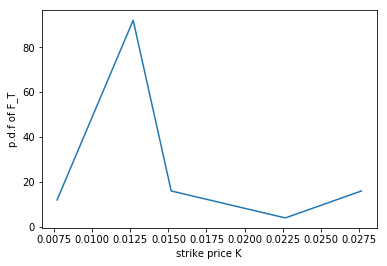

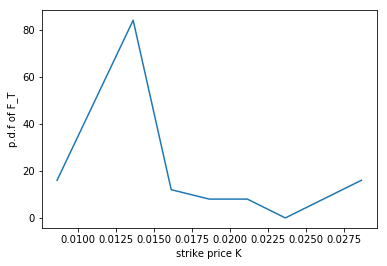

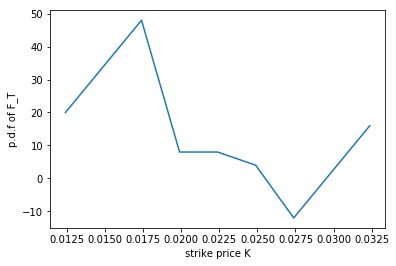

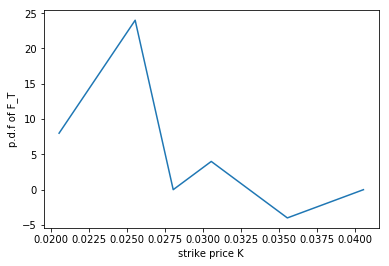

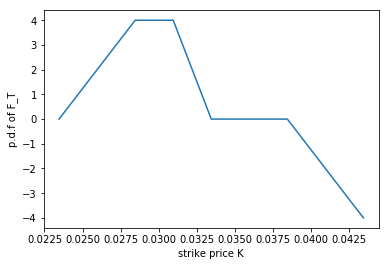

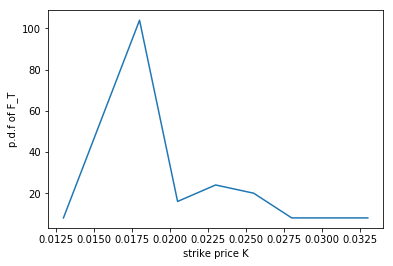

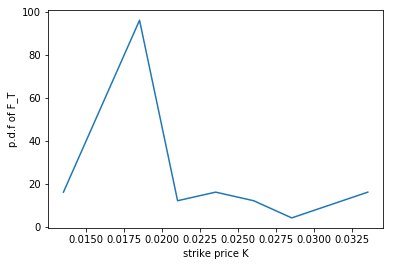

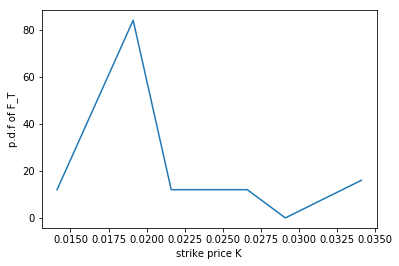

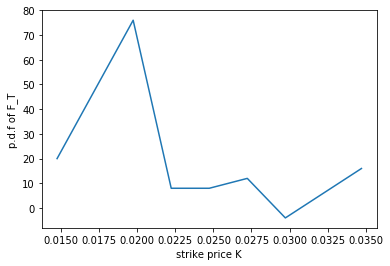

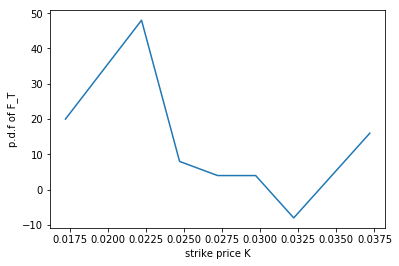

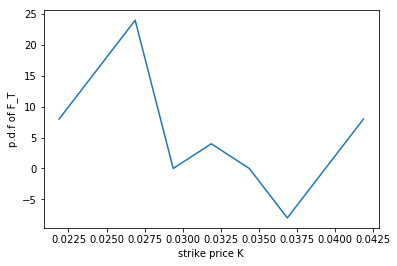

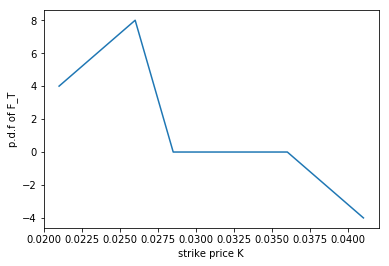

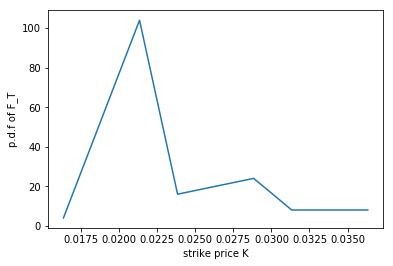

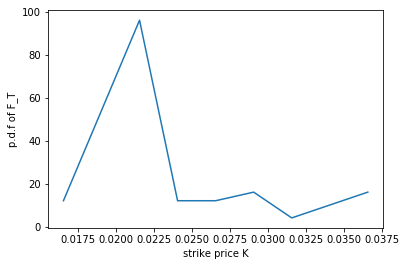

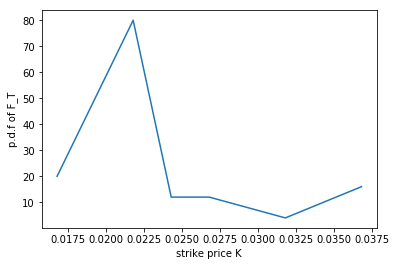

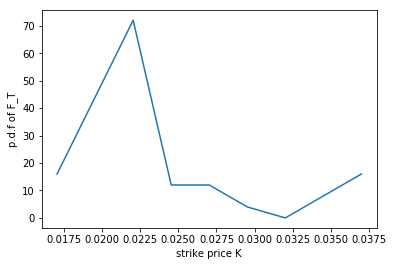

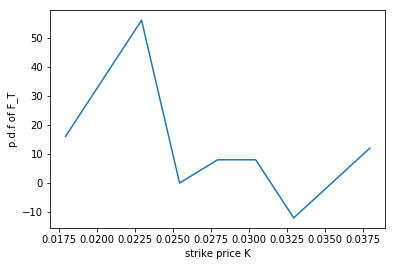

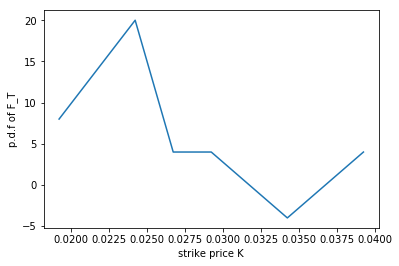

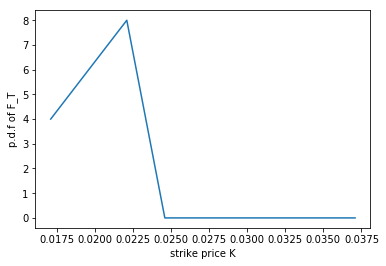

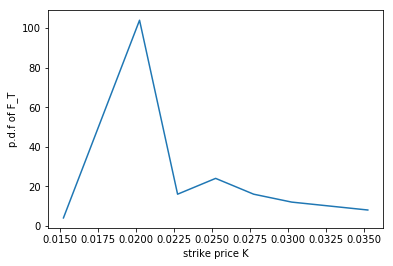

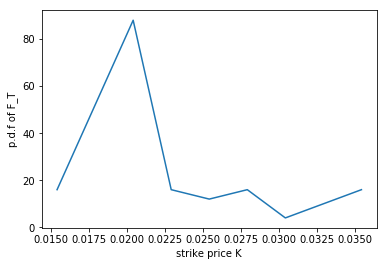

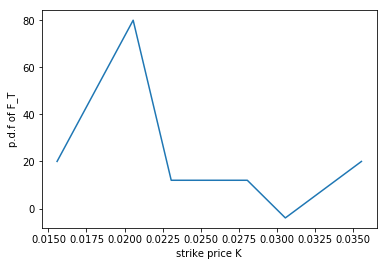

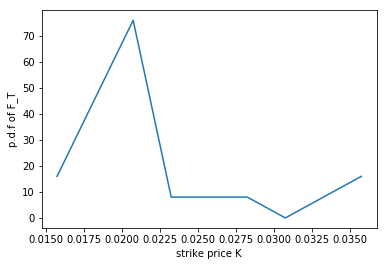

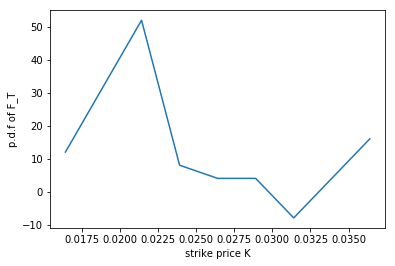

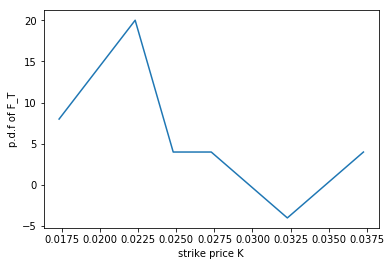

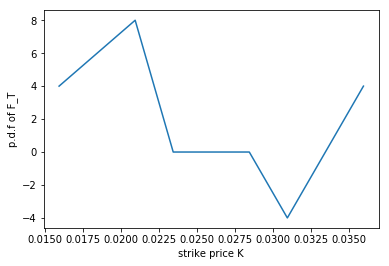

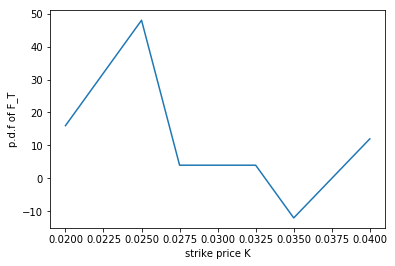

In [306]:
for k in range(len(K_list)):
    plt.plot(K_list[k][1:len(K_list[k])-1],new_sec_der_K[k][3:len(new_sec_der_K[k])-1],
             label= (new_sec_der_K[k][0]+new_sec_der_K[k][1]))
    plt.xlabel('strike price K')
    plt.ylabel('p.d.f of F_T')
    plt.show()